In [ ]:
import ast 
import pandas as pd
import seaborn as sns 

from datasets import load_dataset
import matplotlib.pyplot as plt 

dataset=load_dataset("lukebarousse/data_jobs")
df=dataset['train'].to_pandas()

df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_posted_skill']=df['job_skills'].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)

import ast


df_DA_india['job_skills'] = df_DA_india['job_skills'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


c:\Users\91982\anaconda3\envs\project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_IN = df[(df['job_country']== 'India')].dropna(subset=['salary_year_avg'])

In [3]:
job_titles = df_IN['job_title_short'].value_counts().index[:6].to_list()

job_titles

['Data Engineer',
 'Data Analyst',
 'Data Scientist',
 'Machine Learning Engineer',
 'Senior Data Engineer',
 'Software Engineer']

In [4]:
df_IN_top6 =df_IN[df_IN['job_title_short'].isin(job_titles)]

In [9]:
job_order =df_IN_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

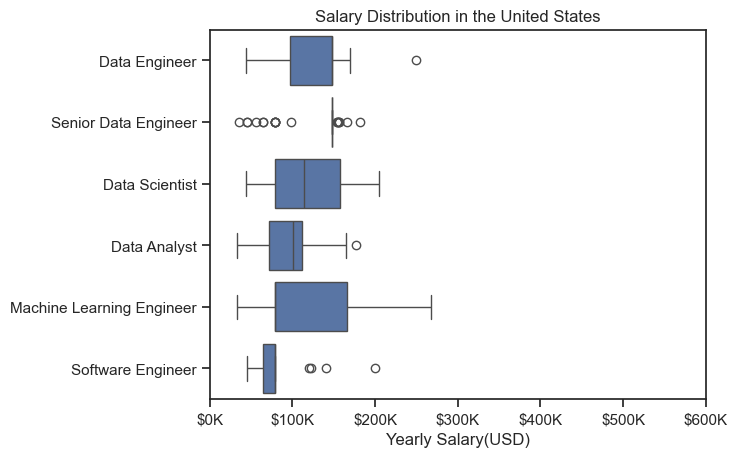

In [11]:
sns.boxplot(data = df_IN_top6 , x='salary_year_avg' , y='job_title_short', order=job_order)
sns.set_theme(style='ticks')

plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary(USD)')
plt.ylabel('')
plt.xlim(0,600000)
ticks_x=plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

Median Salary vs Skills for Data Analysts 


In [24]:
df_DA_india = df[(df['job_country']== 'India')& (df['job_title_short']=='Data Analyst')].copy()
df_DA_india = df_DA_india.dropna(subset =['salary_year_avg'])

In [25]:
import ast


df_DA_india['job_skills'] = df_DA_india['job_skills'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

df_DA_india=df_DA_india.explode('job_skills')
df_DA_india[['job_skills' , 'salary_year_avg']].head(5)

,job_skills,salary_year_avg
11412,python,50400.0
11412,sql,50400.0
11412,aws,50400.0
11412,azure,50400.0
11412,excel,50400.0


In [34]:
df_DA_top_pay = df_DA_india.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by= 'median' ,ascending = False)
df_DA_top_pay=df_DA_top_pay.head(10)
df_DA_top_pay


,count,median
job_skills,,
postgresql,1,165000.0
pyspark,1,165000.0
gitlab,1,165000.0
linux,1,165000.0
mysql,1,165000.0
gdpr,2,163782.0
mongodb,6,163782.0
scala,3,163782.0
neo4j,1,163782.0


In [32]:
df_DA_skills = df_DA_india.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by= 'count' ,ascending = False)
df_DA_skills=df_DA_skills.head(10).sort_values(by='median', ascending=False)
df_DA_skills


,count,median
job_skills,,
power bi,17,111175.0
spark,11,111175.0
tableau,20,108087.5
excel,39,98500.0
sql,46,96050.0
python,36,96050.0
azure,15,93600.0
r,18,79200.0
aws,12,79200.0


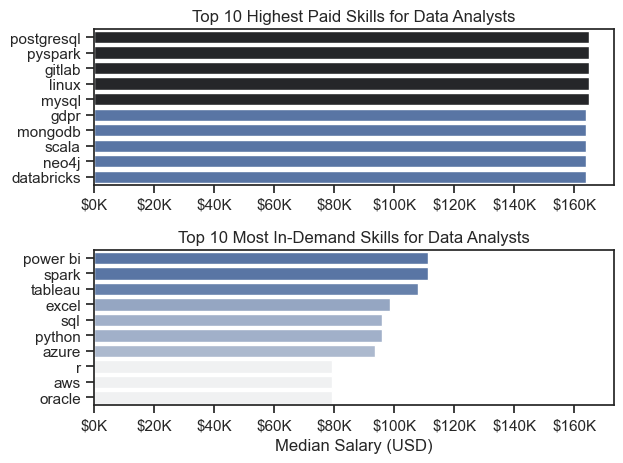

In [35]:
fig, ax = plt.subplots(2, 1)  

sns.set_theme(style='ticks')

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, hue='median', ax=ax[0], palette='dark:b_r')
ax[0].legend().remove()
# original code:
# df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Analystsr')
sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, hue='median', ax=ax[1], palette='light:b')
ax[1].legend().remove()
# original code:
# df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()